In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/SRKads1998/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

<Axes: title={'center': 'Average Salmon Caught Per Region, in Thousands'}, xlabel='Fishing Region', ylabel='Thousands of Salmon Caught'>

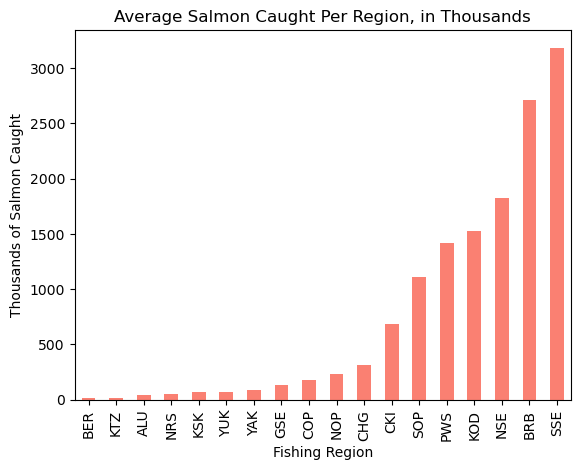

In [12]:
# FINAL CODE

# import pandas and numpy

import pandas as pd
import numpy as np
catch_data = pd.read_csv("data/salmon_data.csv")

# b.
catch_data.head()
catch_data.columns
catch_data.shape
catch_data.dtypes
catch_data['Catch'].unique()
catch_data.describe()

# find the unique values form the relevant column
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

# drop the 'notesRegCode' column
catch_data = catch_data.drop('notesRegCode', axis = 1)

# check the data types of catch_data
catch_data.dtypes

# filter out the row with value 'I' in the 'Catch' column
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

# update catch_data with .replace() to swap 'I' for 1

catch_data['Catch'] = catch_data['Catch'].replace('I', 1)

catch_data

# check the relevant row where value 'I' was found, and make sure it now has a value of 1
catch_1 = catch_data.loc[400]
catch_1

# update 'Catch' column to have data type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')
catch_data['Catch']

# check to make sure its now int64
catch_column_type = catch_data['Catch'].dtype
catch_column_type

# groupby columns 'Region' and 'Catch' and then find the mean. store as its own variable
avg_region = catch_data.groupby('Region')['Catch'].mean()
avg_region

# plot the salmon catches, in thousands of fish.
avg_region.sort_values().plot(kind = 'bar',
                             title = 'Average Salmon Caught Per Region, in Thousands',
                             xlabel = 'Fishing Region',
                             ylabel = 'Thousands of Salmon Caught',
                             color = 'Salmon')

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# a.
# import pandas and numpy

import pandas as pd
import numpy as np
catch_data = pd.read_csv("data/salmon_data.csv")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b.
# conduct exploratory analysis of the data frame
catch_data.head()
catch_data.columns
catch_data.shape
catch_data.dtypes
catch_data['Catch'].unique()
catch_data.describe()

,Year
count,8540.000000
mean,1946.323185
std,30.341709
min,1878.000000
25%,1922.000000
50%,1947.000000
75%,1972.000000
max,1997.000000


In [5]:
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

The reason I choose the functions for exploratrino that I did in the above code cell was because I felt they best provided a rounded understanding of the dataframe. Since I included the head, columns and shape functions, I was able to understand the full range and length of the dataframe, and with dtypes, I was able to understand the nature of each column's data.  

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
# find the unique values form the relevant column
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [7]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [8]:
# drop the 'notesRegCode' column
catch_data = catch_data.drop('notesRegCode', axis = 1)

In [9]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


I would have expected the species column to be a string, since it was solely a series of fish names, but since object is a data type which can be used for many different types of values, this set-up is not too surprising. 

In [10]:
# check the data types of catch_data
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [11]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [ ]:
# filter out the row with value 'I' in the 'Catch' column
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 


In [ ]:
grader.check("q5")

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [ ]:
# update catch_data with .replace() to swap 'I' for 1

catch_data['Catch'] = catch_data['Catch'].replace('I', 1)

catch_data

In [ ]:
# check the relevant row where value 'I' was found, and make sure it now has a value of 1
catch_1 = catch_data.loc[400]
catch_1

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [ ]:
# update 'Catch' column to have data type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')
catch_data['Catch']

In [ ]:
# check to make sure its now int64
catch_column_type = catch_data['Catch'].dtype
catch_column_type

In [ ]:
grader.check("q7")

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
# groupby columns 'Region' and 'Catch' and then find the mean. store as its own variable
avg_region = catch_data.groupby('Region')['Catch'].mean()
avg_region

In [ ]:
grader.check("q8")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

In [ ]:
# plot the salmon catches, in thousands of fish.
avg_region.sort_values().plot(kind = 'bar',
                             title = 'Average Salmon Caught Per Region, in Thousands',
                             xlabel = 'Fishing Region',
                             ylabel = 'Thousands of Salmon Caught',
                             color = 'Salmon')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

What this graph tells us is that there is significant variance in the average amount of salmon catch per management region. We see that while areas such as the Bering River and Copper River subareas have relatively low volumes of salmon catch, other regions such as Bristol Bay and Southern Southeast Alaska. Also worth noting is the units used. Each unit is representing 1000 salmon actually caught. 

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()